# Make A Model from Train Data

## Import, Clean, Drop Duplicate from Train Data

In [1]:
import pandas as pd
import re

In [2]:
df_train = pd.read_table(r"E:\BINAR\Platinum-Challenge\Dataset\train_preprocess.tsv.txt", sep='\t', header=None)
df_train = df_train.rename(columns={0: 'text', 1: 'label'})
df_train.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [4]:
df_train.shape

(11000, 2)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11000 non-null  object
 1   label   11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB


## Cek duplikat

In [3]:
#duplicate check
df_train.duplicated().sum()

67

In [3]:
#drop duplicate
df_train = df_train.drop_duplicates()

In [4]:
#reindex
df_train = df_train.reset_index(drop=True)

In [6]:
#duplicate check
df_train.duplicated().sum()

0

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10933 entries, 0 to 10932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10933 non-null  object
 1   label   10933 non-null  object
dtypes: object(2)
memory usage: 171.0+ KB


In [11]:
df_train.shape

(10933, 2)

## Cleaning Text

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stopword_scratch

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#Fucntion to Clean tweet data
def Clean(text):
    #lowercase for every word
    text = text.lower()

    #Clean Pattern
    #remove USER
    text = re.sub(r'user', ' ', text)
    #remove 'RT'
    text = re.sub(r'rt', ' ', text)
    #remove 'URL'
    text = re.sub(r'url', ' ', text)
    #remove HTTPS
    text = re.sub(r'https', ' ', text)
    #remove HTTP
    text = re.sub(r'http', ' ', text)
    #remove &amp
    text = re.sub(r'&amp', ' ', text)

    #Clean_Unnecessary_Character
    #remove \n or every word afte '\' with space
    text = re.sub(r'\\+[a-zA-Z0-9]+', ' ', text)
    #remove text emoji
    text = re.sub(r'[^a-zA-Z0-9\s]{2,}|:[a-zA-Z0-9]{0,}', ' ', text)
    #remove all unnecessary character 
    text = re.sub(r'[^0-9a-zA-Z\s]+', ' ', text)
    #remove all number
    text = re.sub(r'[0-9]+', ' ', text)
    #remove extra space
    text = re.sub(r'  +', ' ', text)
    #remove space at the start or the end of string
    text = re.sub(r'^ +| +$', '', text)
    
    return text

#tokenization Function
def tokenization(text):
    text = re.split('\W+', text)
    return text

#import file new_kamusalay.csv
kamus_alay = pd.read_csv(r"E:\BINAR\Binar-Gold-Challenge\Dataset\new_kamusalay.csv", encoding = 'ISO-8859-1', header = None)
kamus_alay = kamus_alay.rename(columns={0: 'kata alay', 1: 'arti kata'})

#Create dictionary from kamus_alay
kamus_alay_dict = dict(zip(kamus_alay['kata alay'], kamus_alay['arti kata']))

#normalization function to convert every word tha contain 'kata alay' to 'arti kata'
def normalization(text):
    newlist = []
    for word in text:
        if word in kamus_alay_dict:
            text = kamus_alay_dict[word]
            newlist.append(text)
        else:
            text = word
            newlist.append(text)
    return newlist

#remove stopwords

#list stopword from NLTK
list_stopwords = stopword_scratch.words('indonesian')
list_stopwords_en = stopword_scratch.words('english')
list_stopwords.extend(list_stopwords_en)
list_stopwords.extend(['ya', 'yg', 'ga', 'yuk', 'dah'])
stopword_list = list_stopwords

#stopword list
f = open(r"E:\BINAR\Binar-Gold-Challenge\Dataset\tala-stopwords-indonesia.txt")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

stopword_list.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       'gue', 'yah', 'kayak'])

stopword_list = set(stopword_list)

#remove stopword function
def remove_stopwords(text):
    text = [word for word in text if word not in stopword_list]
    return text

#function to run all the function
def clean_data(text):
    text = Clean(text)
    text = tokenization(text)
    text = normalization(text)
    text = remove_stopwords(text)

    return text

In [7]:
df_train['text_clean'] = df_train.text.apply(lambda x: ' '.join(map(str, clean_data(x))))
df_train.head()

,text,label,text_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung dimiliki pengusaha pabrik puluhan terke...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus k mmbri hujjah ai diwlh suar...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatra bandung nyaman ...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia unboxing paket barang bagus men...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,aduh mahasiswa sombong kasih kakak kuning bela...


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10933 entries, 0 to 10932
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        10933 non-null  object
 1   label       10933 non-null  object
 2   text_clean  10933 non-null  object
dtypes: object(3)
memory usage: 256.4+ KB


## Split Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
Data_text = df_train.text_clean
Data_text

0        warung dimiliki pengusaha pabrik puluhan terke...
1        mohon ulama lurus k mmbri hujjah ai diwlh suar...
2        lokasi strategis jalan sumatra bandung nyaman ...
3        betapa bahagia unboxing paket barang bagus men...
4        aduh mahasiswa sombong kasih kakak kuning bela...
                               ...                        
10928    f demokrat dorong upaya kemandirian energi nas...
10929                                                bosan
10930    enak masakan kepiting menyenangkan memilih kep...
10931            pagi pagi tol pasteur macet parah jengkel
10932    belanja yogyakarta riau junction pe kali lihat...
Name: text_clean, Length: 10933, dtype: object

In [10]:
classes = df_train.label
classes

0        positive
1         neutral
2        positive
3        positive
4        negative
           ...   
10928     neutral
10929    positive
10930    positive
10931    negative
10932    positive
Name: label, Length: 10933, dtype: object

### Full to 80% Train Data & 20% Test Data

In [11]:
X_train_text, X_test_text, y_train_label, y_test_label = train_test_split(Data_text, classes, test_size=0.2)

In [12]:
print('Panjang X_train: ', X_train_text.shape[0])
print('Panjang y_train: ', y_train_label.shape[0])
print('Panjang X_test: ', X_test_text.shape[0])
print('Panjang y_test: ', y_test_label.shape[0])

Panjang X_train:  8746
Panjang y_train:  8746
Panjang X_test:  2187
Panjang y_test:  2187


In [ ]:
pickle.dump(X_train_text, open("X_train_text.p", "wb"))

In [ ]:
pickle.dump(y_train_label, open("y_train_label.p", "wb"))

In [ ]:
pickle.dump(X_test_text, open("X_test_text.p", "wb"))

In [ ]:
pickle.dump(y_test_label, open("y_test_label.p", "wb"))

### Train Data

In [15]:
y_train[y_train == 'positive'].shape

(5112,)

In [16]:
y_train[y_train == 'negative'].shape

(2726,)

In [17]:
y_train[y_train == 'neutral'].shape

(908,)

### Test Data

In [18]:
y_test[y_test == 'positive'].shape

(1271,)

In [19]:
y_test[y_test == 'negative'].shape

(686,)

In [20]:
y_test[y_test == 'neutral'].shape

(230,)

## Feature Extraction using TF-IDF

In [13]:
#Convert X_train_text into list form
Train_preprocessed = X_train_text.tolist()
Train_preprocessed[0:5]

['resto suasana nyaman layanan tersedia menu masakan seafood berbahan dasar kepiting udang kerang bawal kerapu udang goreng mentega enak mantap udang asam manis manis segar kepiting saus singapura mantap masakan enak mantap',
 'salah kedai panggang lapo bandung menyajikan saksang panggang rendang babi nasi goreng babi kangkung kriuk salah favorit',
 'ozon dasar anjing mendidik enak mendidik anjing pintar berkelit mencuri uang rakyat pura pura suara rekaman dasar goblok',
 'beli rumah berduit dasar investment embah duit sewakan harga mahal jual untung angin teruskan menindas golongan berkemampuan',
 'bangsa mars ribut khitan muslim susah bangkit umat dungu zahra joe']

In [43]:
pickle.dump(Train_preprocessed, open("Train_preprocessed.p", "wb"))

In [44]:
pickle.dump(y_train_label, open("Train_label.p", "wb"))

In [15]:
#Convert X_test_text into list form
Test_preprocessed = X_test_text.tolist()
Test_preprocessed[0:5]

['panas',
 'makan malam sop butut bakar to illa chicken the restaurant mmm nomnom ditambah pemandangan kota bandung memukau pelayanan oke mbak della outfit of the day skywalkny terima kasih mbak della the restoran makanan ketagihan',
 'bodoh marah indosat gangguan mulu ah',
 'aduh marah marah diperiksa relakan bicara sepe i orang bersalah',
 'batagor lumayan enak sehabis belanja pasar dago harga relatif murah suka batagor kering bumbu kacang dibanyakin']

In [46]:
pickle.dump(Train_preprocessed, open("Test_preprocessed.p", "wb"))

In [47]:
pickle.dump(y_test_label, open("Test_label.p", "wb"))

### Load Data From Pickle

In [2]:
import pickle

In [3]:
file = open(r"E:\BINAR\Platinum-Challenge\Neural_Netork_MLP\Train_preprocessed.p", "rb")
Train_preprocessed = pickle.load(file)
file.close()

In [40]:
file = open(r"E:\BINAR\Platinum-Challenge\Neural_Netork_MLP\Test_preprocessed.p", "rb")
Test_preprocessed = pickle.load(file)
file.close()

In [5]:
file = open(r"E:\BINAR\Platinum-Challenge\Neural_Netork_MLP\feature.p", "rb")
count_vect = pickle.load(file)
file.close()

In [6]:
file = open(r"E:\BINAR\Platinum-Challenge\Neural_Netork_MLP\Train_label.p", "rb")
y_train_label = pickle.load(file)
file.close()

In [45]:
file = open(r"E:\BINAR\Platinum-Challenge\Neural_Netork_MLP\Test_label.p", "rb")
y_test_label = pickle.load(file)
file.close()

### TF-IDF Vectorizer

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [17]:
#Proses Feature Extraction
count_vect = TfidfVectorizer()

In [50]:
pickle.dump(count_vect, open("feature.p", "wb"))

In [18]:
#inisiasi value
X_train = count_vect.fit_transform(Train_preprocessed)
print("Feature Extraction For Train Data Has Successfully Completed")

X_test = count_vect.transform(Test_preprocessed)
print("Feature Extraction For Test Data Has Successfully Completed")

Feature Extraction For Train Data Has Successfully Completed
Feature Extraction For Test Data Has Successfully Completed


In [19]:
y_train = y_train_label.reset_index(drop=True)

In [20]:
y_test = y_test_label.reset_index(drop=True)

### Checking Vectorizer

In [21]:
print(X_train[:10])

  (0, 11493)	0.17985362330576565
  (0, 10927)	0.1462586452876569
  (0, 11030)	0.1240366132168042
  (0, 6985)	0.26400254870451345
  (0, 515)	0.1733792382928014
  (0, 6998)	0.3506068940900241
  (0, 3697)	0.12341893330896729
  (0, 7912)	0.19325101745090564
  (0, 4283)	0.09951024643974629
  (0, 5857)	0.2066484115960457
  (0, 883)	0.20138543285064628
  (0, 5854)	0.2038851274342282
  (0, 13007)	0.4490329114773591
  (0, 5829)	0.31122627690381466
  (0, 2475)	0.15139242701183564
  (0, 1053)	0.20973750047272763
  (0, 10969)	0.16274512830947888
  (0, 7061)	0.22918968458780528
  (0, 7920)	0.08091770111661985
  (0, 12595)	0.1279342122068107
  (0, 6505)	0.15645924222292246
  (0, 8682)	0.09264809554142804
  (0, 11817)	0.09306651828856748
  (0, 10519)	0.10875990158723221
  (1, 3867)	0.15221922172690408
  :	:
  (6, 10926)	0.2163164654004624
  (6, 10003)	0.16282990031873681
  (6, 7571)	0.2557646788810702
  (6, 5682)	0.2656642441802108
  (6, 11911)	0.34064630189437656
  (6, 11137)	0.21397570830476775
  (

In [22]:
print(X_test[:10])

  (0, 8973)	1.0
  (1, 12758)	0.17016245722484316
  (1, 12648)	0.40327891008897765
  (1, 12460)	0.13992649383522643
  (1, 11641)	0.1578389064408637
  (1, 10523)	0.0908758060993953
  (1, 10518)	0.18562195530950923
  (1, 9240)	0.10005633092980896
  (1, 9207)	0.09655058700705238
  (1, 8744)	0.1201551957459567
  (1, 8725)	0.19889813443112067
  (1, 8251)	0.23240069241016262
  (1, 7432)	0.24009415522334154
  (1, 7130)	0.3276128396243083
  (1, 6925)	0.09804738483148782
  (1, 6894)	0.0642946572594204
  (1, 6893)	0.07009771277911851
  (1, 6252)	0.10442488699729552
  (1, 5942)	0.15663225359667954
  (1, 5459)	0.13601546000291706
  (1, 3331)	0.13829282969138726
  (1, 2546)	0.41069503102880944
  (1, 2488)	0.25093748204133287
  (1, 2092)	0.14658728261608148
  (1, 1851)	0.25093748204133287
  :	:
  (8, 7371)	0.15312158729171554
  (8, 7203)	0.22030175907221847
  (8, 6925)	0.1215947259596914
  (8, 6790)	0.2747672179103282
  (8, 6296)	0.1732715182437719
  (8, 5641)	0.18495312355965837
  (8, 4492)	0.092089

In [23]:
y_train[:10]

0    positive
1    positive
2    negative
3    positive
4    negative
5    negative
6    positive
7    negative
8    negative
9    negative
Name: label, dtype: object

In [24]:
y_test[:10]

0    negative
1    positive
2    negative
3    negative
4    positive
5    negative
6    positive
7    positive
8    positive
9    negative
Name: label, dtype: object

## Model Neural Network (MLP Classifier)

In [25]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [26]:
model_MLP = MLPClassifier( early_stopping=True, validation_fraction=0.25)
model_MLP.fit(X_train, y_train)

print('Training selesai')

Training selesai


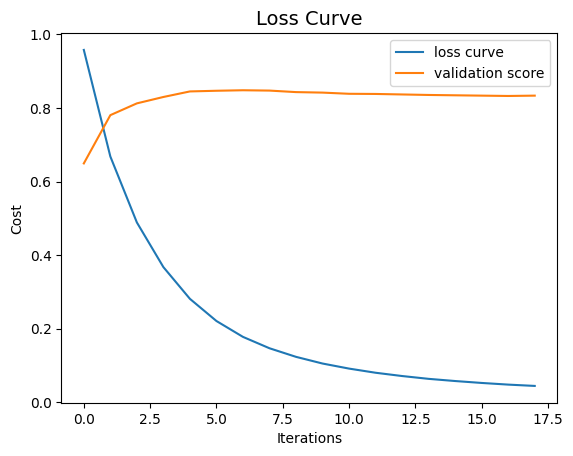

In [27]:
plt.plot(model_MLP.loss_curve_, label='loss curve')
plt.plot(model_MLP.validation_scores_, label= 'validation score')
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [35]:
model_MLP.classes_

array(['negative', 'neutral', 'positive'], dtype='<U8')

In [28]:
model_MLP.loss_curve_

[0.9578365470527916,
 0.6680468211458176,
 0.48883448658104994,
 0.36738194417219455,
 0.281155609912365,
 0.22087076391109972,
 0.17771411419588254,
 0.1467848648847697,
 0.12344407933525639,
 0.10526823380141903,
 0.09150162551595657,
 0.08021779192739806,
 0.07129325390990285,
 0.06361944316093886,
 0.05769758459567459,
 0.052489905691801036,
 0.04797755084386389,
 0.04440706541138211]

In [29]:
model_MLP.validation_scores_

[0.6492912665752172,
 0.7805212620027435,
 0.8125285779606767,
 0.8299039780521262,
 0.8449931412894376,
 0.846822130772748,
 0.848193872885231,
 0.8472793781435757,
 0.8431641518061271,
 0.8417924096936442,
 0.838591678097851,
 0.8381344307270233,
 0.8367626886145405,
 0.8353909465020576,
 0.8344764517604024,
 0.8335619570187471,
 0.8326474622770919,
 0.8335619570187471]

In [51]:
import pickle

In [110]:
pickle.dump(model_MLP, open("model_MLP_2.p", "wb"))

## Hyper Parameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 200],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'early_stopping': [True],
    'validation_fraction': [0.25]
}

In [ ]:
grid = GridSearchCV(model_MLP, param_grid, n_jobs= -1)
grid.fit(X_train, y_train)

print(grid.best_params_)

In [ ]:
grid_predictions = grid.predict(X_test) 

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

## Cross-Validation

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np

In [12]:
#Shuffle Data
kf = KFold(n_splits=4, random_state=42, shuffle=True)

In [17]:
accuracies = []

X = X_train
y = y_train

for iteration, data in enumerate(kf.split(X), start=1):
    # ------------------------------ TRAIN DATASET ----------------------------------
    data_train = X[data[0]]
    target_train = y[data[0]]
    
    #Save Train Dataset
    # pickle.dump(clf, open(f"X_train_{iteration}.p", "wb"))
    # pickle.dump(clf, open(f"y_train_{iteration}.p", "wb"))

    # ------------------------------- TEST DATASET ----------------------------------
    data_test = X[data[1]]
    target_test = y[data[1]]

    #Save Test Dataset
    # pickle.dump(clf, open(f"X_test_{iteration}.p", "wb"))
    # pickle.dump(clf, open(f"y_test_{iteration}.p", "wb"))

    # ----------------------------------- MODEL -------------------------------------
    clf = MLPClassifier(early_stopping=True)
    clf.fit(data_train, target_train)

    #save every model
    # pickle.dump(clf, open(f"model_MLP_{iteration}.p", "wb"))

    # ----------------------------- PREDICTION (TEST) -------------------------------
    preds = clf.predict(data_test)
    accuracy = accuracy_score(target_test, preds)

    # ----------------------------- PRINT REPORT ------------------------------------
    print("Training ke", iteration)
    print(classification_report(target_test, preds))
    print("--------------------------------------------------------------------------")

    accuracies.append(accuracy)

Training ke 1
              precision    recall  f1-score   support

    negative       0.76      0.81      0.78       673
     neutral       0.82      0.50      0.62       230
    positive       0.89      0.93      0.91      1284

    accuracy                           0.84      2187
   macro avg       0.83      0.75      0.77      2187
weighted avg       0.84      0.84      0.84      2187

--------------------------------------------------------------------------
Training ke 2
              precision    recall  f1-score   support

    negative       0.75      0.77      0.76       673
     neutral       0.79      0.55      0.65       234
    positive       0.88      0.91      0.89      1280

    accuracy                           0.83      2187
   macro avg       0.80      0.74      0.77      2187
weighted avg       0.83      0.83      0.83      2187

--------------------------------------------------------------------------
Training ke 3
              precision    recall  f1-score   

In [ ]:
average_accuracy = np.mean(accuracies)
print("Rata-rata Accuracy: ", average_accuracy)

In [ ]:
    # ----------------------------------- VISUALISAI --------------------------------
    #Visualisasi persebaran Data
    data_2 = np.array([np.nan] * len(Train_preprocessed))
    ax.scatter(range(len(data_2)),
               [iteration + 0.5] * len(data_2),
               c = data_2,
               marker = "_",
               cmap = cmap_cv,
               lw = 10,
               vmin = -0.2,
               vmax = 1.2)
# Formatting
yticklabels = ['1', '2', '3', '4', 'class']
ax.set(yticks=np.arange(n_splits + 2) + 0.5,
       yticklabels=yticklabels,
       xlabel="Sample index",
       ylabel="CV iteration",
       ylim=[n_splits + 2.2, -0.2],
       xlim=[0, 100],)
ax.set_title("{}".format(type(kf).__name__), fontsize=15)

## Evaluasi Akhir

In [31]:
from sklearn.metrics import classification_report

In [37]:
file = open(r"E:\BINAR\Platinum-Challenge\model_MLP.p", "rb")
model_MLP = pickle.load(file)
file.close()

In [32]:
test = model_MLP.predict(X_test)

print("Testing selesai")

print(classification_report(y_test, test))

Testing selesai
              precision    recall  f1-score   support

    negative       0.77      0.79      0.78       659
     neutral       0.72      0.54      0.62       212
    positive       0.89      0.92      0.91      1316

    accuracy                           0.84      2187
   macro avg       0.80      0.75      0.77      2187
weighted avg       0.84      0.84      0.84      2187



In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

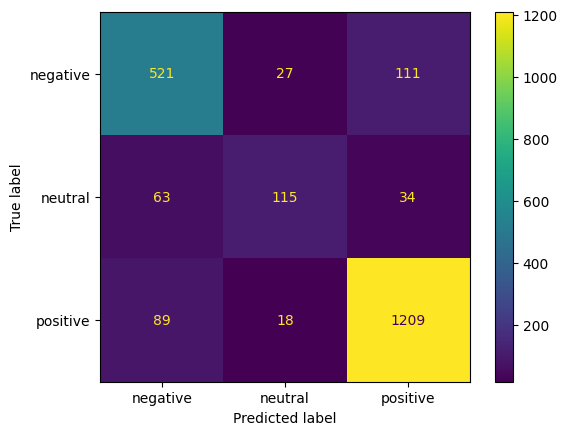

In [34]:
#Matrix confusion
cm = confusion_matrix(y_test, test, labels=model_MLP.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_MLP.classes_)

disp.plot()
plt.show()

In [ ]:
Data_positive = 1260
Data_negative = 693
Data_neutral = 234

# Implement Model to New Data Set

## Read the data (main)

In [10]:
df_tweet = pd.read_csv(r"E:\BINAR\Binar-Gold-Challenge\Dataset\data.csv", encoding='ISO-8859-1')
df_tweet.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [11]:
print("Dataset size:", df_tweet.shape)
print("Columns are:", df_tweet.columns)

Dataset size: (13169, 13)
Columns are: Index(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion',
       'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak',
       'HS_Moderate', 'HS_Strong'],
      dtype='object')


In [12]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


## Cek Duplicate

In [13]:
df_tweet.shape

(13169, 13)

In [14]:
df_tweet.duplicated(subset='Tweet').sum()

146

In [15]:
df_tweet.duplicated().sum()

125

In [16]:
df_tweet = df_tweet.drop_duplicates(subset='Tweet')

In [17]:
df_tweet.duplicated(subset='Tweet').sum()

0

In [18]:
df_tweet.shape

(13023, 13)

## Cleaning Data